In [1]:
from numexpr.necompiler import collapseDuplicateSubtrees

print('hello world')

hello world


In [2]:
from strategy1 import Gold_5min_Strategy
from backtesting import Strategy, Backtest
from backtesting.lib import crossover
from backtesting.test import SMA
import yfinance as yf
import pandas as pd

C:\Users\tomas\miniconda3\envs\python_algo\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

C:\Users\tomas\miniconda3\envs\python_algo\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
C:\Users\tomas\miniconda3\envs\python_algo\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


ModuleNotFoundError: No module named 'yfinance'

In [3]:
gold_data=pd.read_csv('XAU_5m_data_2004_to_2024-09-20.csv')
print(gold_data.head())

In [4]:
gold_data['Datetime'] = pd.to_datetime(gold_data['Date']+' '+gold_data['Time'])
print(gold_data.head())

Reseting the index for the dataset and deleting unwanted columns



In [5]:
gold_data.drop(columns=['Date', 'Time'], inplace=True)
gold_data.dropna(inplace=True)
gold_data.set_index('Datetime', inplace=True)
print(gold_data.head())


In [8]:
gold_data.to_csv('gold_5m_data2.csv')

In [17]:

print(gold_data.info())
print(gold_data.tail(100))

In [15]:
gold_data2=pd.read_csv('XAU_5m_data_2004_to_2024-09-20.csv')
print(gold_data2.info())

In [ ]:
print('gold_data2.head()')

### Linear regression for market prediction

In [17]:
import pandas as pd
import numpy as np
raw=pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                           index_col=0, parse_dates=True).dropna()



In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [6]:
symbol='EUR='
data=pd.DataFrame(raw[symbol])

In [13]:
data.rename(columns={symbol:'price'},inplace=True)
print(data.head())

             price
Date              
2010-01-04  1.4411
2010-01-05  1.4368
2010-01-06  1.4412
2010-01-07  1.4318
2010-01-08  1.4412


Creating columns with 5 lags


In [14]:
lags=5

cols=[]
for i in range(1,lags+1):
    col=f"lag_{i}"
    data[col]=data['price'].shift(i)
    cols.append(col)
data.dropna(inplace=True)
print(data.head())

             price   lag_1   lag_2   lag_3   lag_4   lag_5
Date                                                      
2010-01-11  1.4513  1.4412  1.4318  1.4412  1.4368  1.4411
2010-01-12  1.4494  1.4513  1.4412  1.4318  1.4412  1.4368
2010-01-13  1.4510  1.4494  1.4513  1.4412  1.4318  1.4412
2010-01-14  1.4502  1.4510  1.4494  1.4513  1.4412  1.4318
2010-01-15  1.4382  1.4502  1.4510  1.4494  1.4513  1.4412


Getting the regression parameters and return the 1st tuple with coefficients

In [20]:
reg=np.linalg.lstsq(data[cols],data['price'],rcond=None)[0]
print(reg)

[ 0.98635864  0.02292172 -0.04769849  0.05037365 -0.01208135]


Calculating the predictions and plotting it


<Axes: xlabel='Date'>

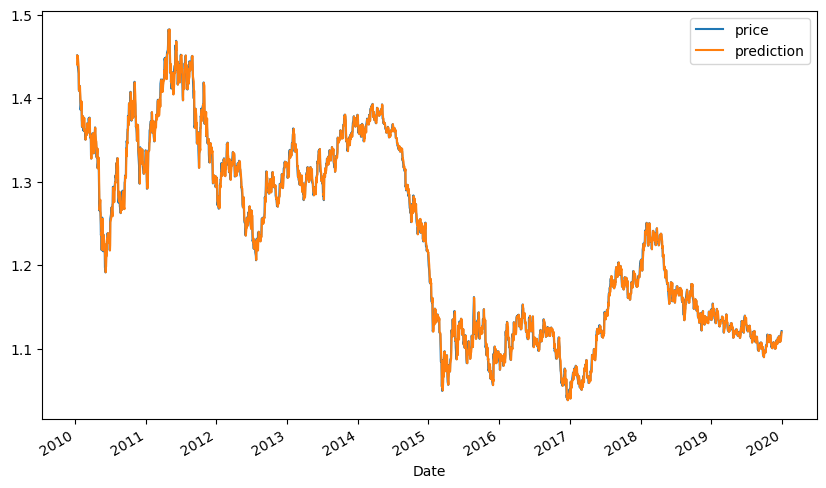

In [21]:
data['prediction']=np.dot(data[cols],reg)
data[['price','prediction']].plot(figsize=(10,6))

<Axes: xlabel='Date'>

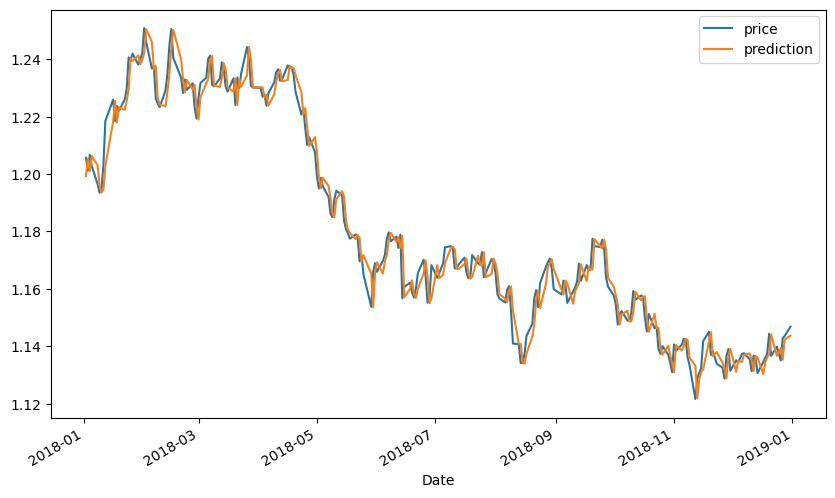

In [25]:
data[['price','prediction']].loc['2018-1-1':'2019-1-1'].plot(figsize=(10,6))

## Predicting future returns